DenseNet 121

In [1]:
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


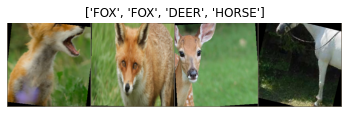

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
densenet121 = models.densenet121(pretrained=True)
num_ftrs = densenet121.classifier.in_features
densenet121.classifier = nn.Linear(num_ftrs, CLASS_COUNTER)

densenet121 = densenet121.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(densenet121.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(densenet121)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Epoch 0/99
----------
[TRAIN] Loss: 1.5143 Acc: 0.4631 F1-Score: 0.1086 Precision: 0.1656 Recall: 0.1160
[VALID] Loss: 0.7677 Acc: 0.8592 F1-Score: 0.2120 Precision: 0.2365 Recall: 0.2148

Epoch 1/99
----------
[TRAIN] Loss: 1.0550 Acc: 0.6784 F1-Score: 0.1717 Precision: 0.2302 Recall: 0.1698
[VALID] Loss: 0.3746 Acc: 0.9445 F1-Score: 0.2367 Precision: 0.2472 Recall: 0.2361

Epoch 2/99
----------
[TRAIN] Loss: 0.8102 Acc: 0.7698 F1-Score: 0.1977 Precision: 0.2422 Recall: 0.1929
[VALID] Loss: 0.2528 Acc: 0.9366 F1-Score: 0.2340 Precision: 0.2459 Recall: 0.2342

Epoch 3/99
----------
[TRAIN] Loss: 0.6863 Acc: 0.8005 F1-Score: 0.2064 Precision: 0.2437 Recall: 0.2006
[VALID] Loss: 0.1922 Acc: 0.9463 F1-Score: 0.2364 Precision: 0.2463 Recall: 0.2366

Epoch 4/99
----------
[TRAIN] Loss: 0.6081 Acc: 0.8137 F1-Score: 0.2110 Precision: 0.2455 Recall: 0.2039
[VALID] Loss: 0.1749 Acc: 0.9481 F1-Score: 0.2369 Precision: 0.2465 Recall: 0.2370

Epoch 5/99
----------
[TRAIN] Loss: 0.5840 Acc: 0.8304 

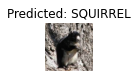

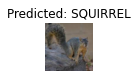

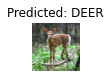

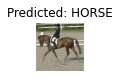

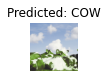

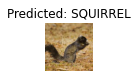

In [5]:
base_model = train_model(densenet121,"densenet121", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

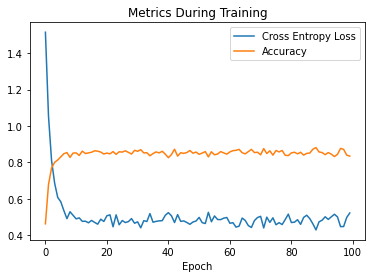

In [6]:
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.title('Metrics During Training');

In [7]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.1109 Acc: 0.9721 F1-Score: 0.2444 Precision: 0.2485 Recall: 0.2440
Test complete in 0m 9s
